**Title: Star Classification**

**Introduction**
There are billions of stars in our sky and every star is unique. There are brown, white, and red dwarfs, main sequence stars like the sun and also hyper and super giants. We can use various properties of the star to determine which category it belongs to. In this data analysis, we will look at a star dataset which includes features of 240 stars such as the surface temperature in Kelvin, the luminosity (energy emitted per second) in solar luminosity, radius in solar radius, visual magnitude, star type, star colour, and stellar class of the star. The question we will address is whether we can effectively, consistently, and correctly classify a new star’s type based on its luminosity, radius, and temperature and compare it to current observations of various stars.
 
**Methods**
To approach this question, we will look at the columns which are key to understanding a star’s type. These include: the stars radius, temperature, and luminosity. We will go about this problem by applying the classification method. A k-value will be decided using the vfold_cv method because there are many stars in our data set. There could be stars that are close neighbours but have a different star type; it's best to have a value for k which optimizes accuracy. The predictors which we settled on are the luminosity, radius, and temperature and this is in fact what a lot of astronomers use to classify a star. We need to scale and center these variables since each variable has both small and large numbers. We can visualize our results by making a bar graph with the star type on the x-axis and the total number of observations of each type represented as bars. We distribute the bars according to correctly predicted by our model and incorrectly predicted by our model.
 
**Expected outcomes and significance**
We expect our results to be fairly accurate because we are using the predictors which astronomers use to classify a star’s type. We expect stars with a large radius to be giants and small radius stars to be dwarfs. The temperature and luminosity will help determine which specific category they will fit into within giants, main sequence, and dwarfs. The impact the findings can have is that we will create a model which will not only make it easier to classify star type, but it will help support the hypothesis of astronomers regarding luminosity, radius, and temperature being the key factors for star type classification. Because there is no clear way to classify the colour of a star, a future question this can lead to is: what is the most effective way to classify star colour? A range of variables can affect the colour of a star and further study on the relationship between star type and star colour is needed.

Parsed with column specification:
cols(
  temperature = col_character(),
  luminosity = col_character(),
  radius = col_character(),
  visual_magnitude = col_character(),
  star_type = col_character(),
  color = col_character(),
  spectral_class = col_character()
)



temperature,luminosity,radius,visual_magnitude,star_type,color,spectral_class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
3068,0.0024,0.17,16.12,0,Red,M
3042,0.0005,0.1542,16.6,0,Red,M
2600,0.0003,0.102,18.7,0,Red,M
2800,0.0002,0.16,16.65,0,Red,M
1939,0.000138,0.103,20.06,0,Red,M
2840,0.00065,0.11,16.98,0,Red,M
2637,0.00073,0.127,17.22,0,Red,M
2600,0.0004,0.096,17.4,0,Red,M


Warning message:
“Problem with `mutate()` input `luminosity`.
ℹ NAs introduced by coercion
ℹ Input `luminosity` is `as.numeric(luminosity)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `radius`.
ℹ NAs introduced by coercion
ℹ Input `radius` is `as.numeric(radius)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `temperature`.
ℹ NAs introduced by coercion
ℹ Input `temperature` is `as.numeric(temperature)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `visual_magnitude`.
ℹ NAs introduced by coercion
ℹ Input `visual_magnitude` is `as.numeric(visual_magnitude)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
`summarise()` ungrouping output (override with `.groups` argument)



star_type,stars_in_class,luminosity_avg,radius_avg,temperature_avg
<fct>,<int>,<dbl>,<dbl>,<dbl>
Brown Dwarf,30,7.395667e-04,0.1107400,2972.433
Red Dwarf,30,5.922667e-03,0.3570567,3298.567
White Dwarf,30,3.017167e-03,0.0107590,14234.100
Main Sequence,30,3.513031e+04,4.8263667,16958.967
Super Giant,30,3.000917e+05,54.2000000,14196.200
Hyper Giant,30,3.189647e+05,1317.2633333,12237.433


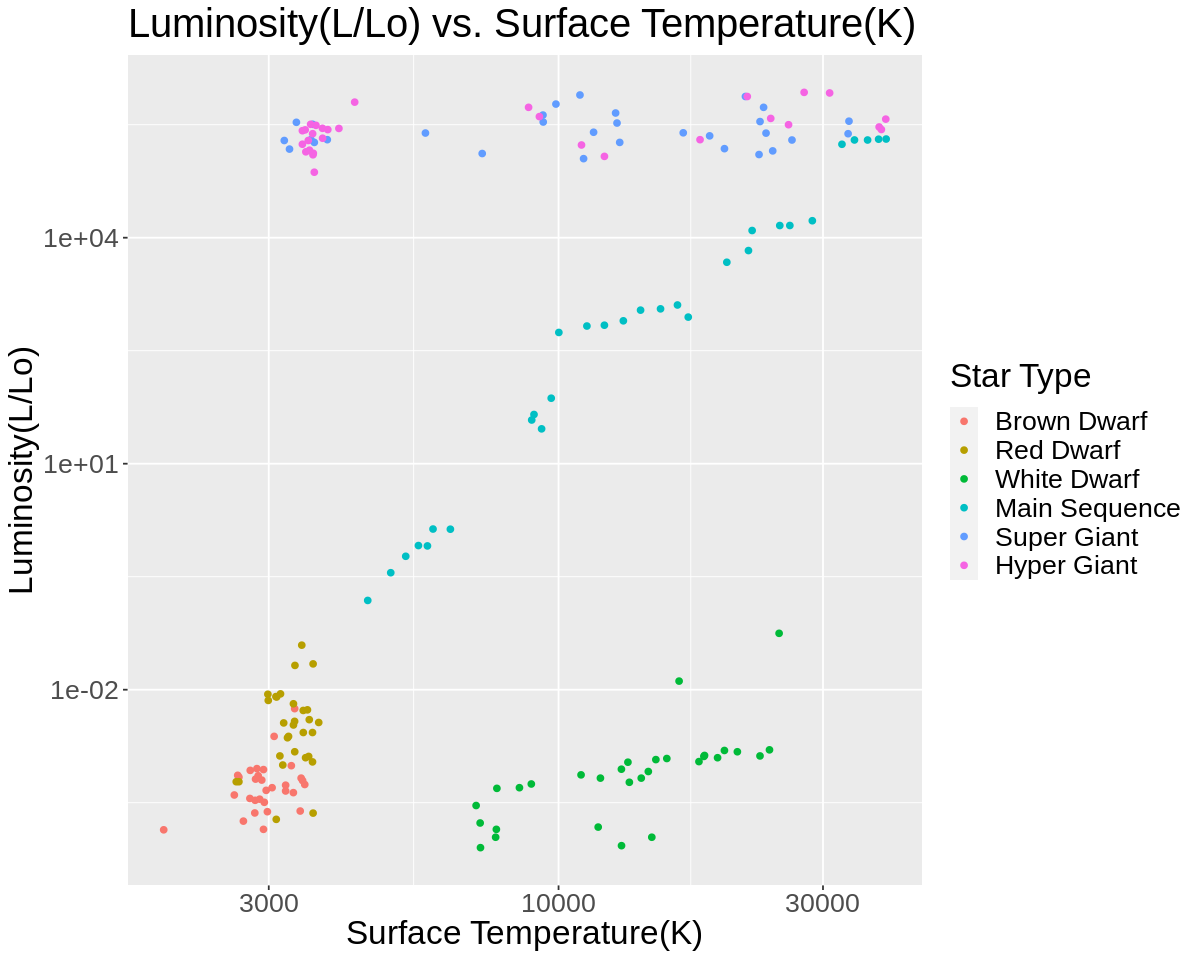

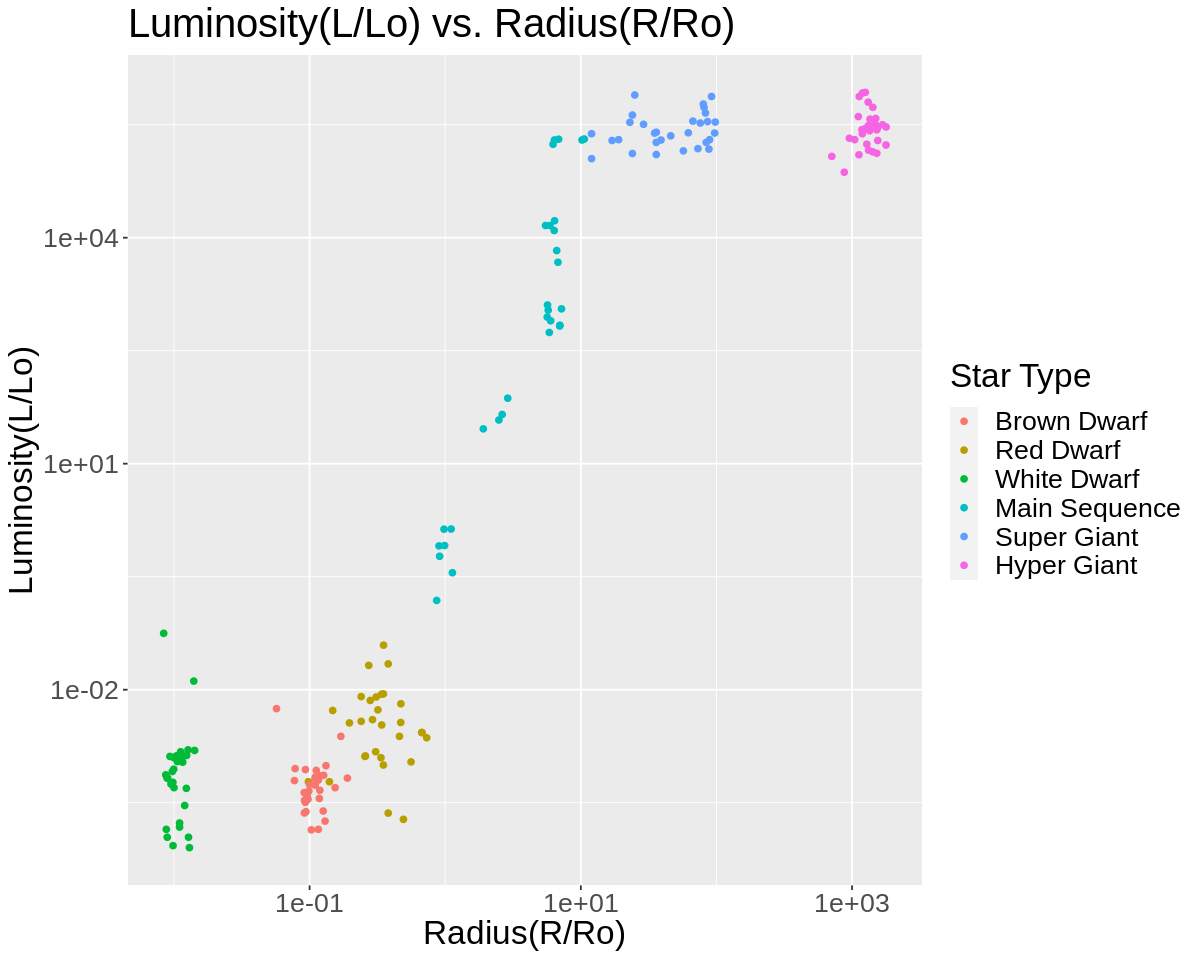

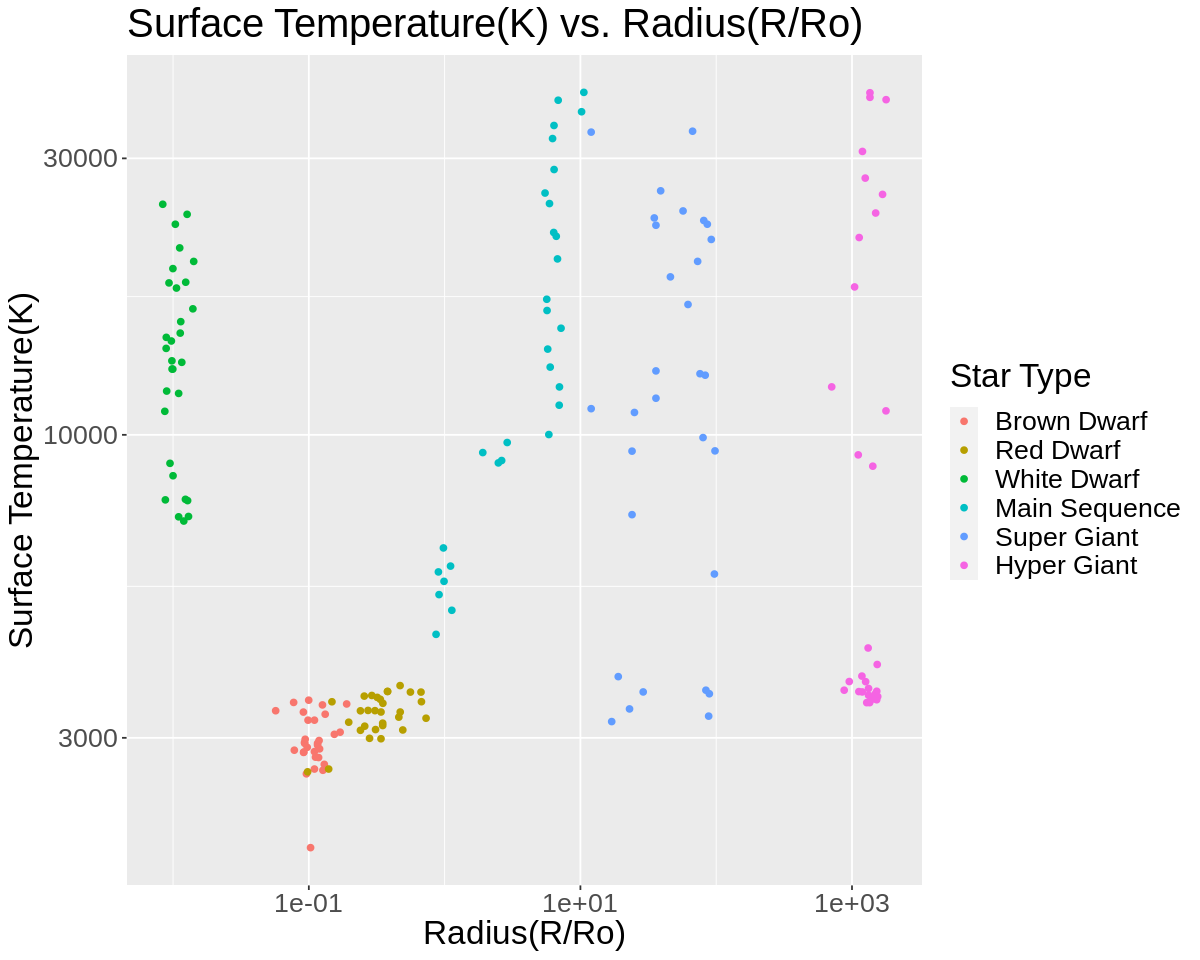

In [19]:
#Load all libraries and set plot dimensions
options(repr.plot.height = 8, repr.plot.width = 10)
library(tidyverse)
library(dplyr)
library(tidymodels)


#Column names 
cols <- c("temperature", "luminosity", "radius", "visual_magnitude", "star_type", "color", "spectral_class")

#Load data frame and change the values of star type to their actual name
url <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vR0bAqJh1jznOVyOZbHPL3kLbFjX6YzCWwMh3vMZEeBZq95tdDfcN9vqDP6XUf2j167vXr4oxnDvhb4/pub?gid=1536482276&single=true&output=csv"
star <- read_csv(url, col_names = cols)
star$star_type[star$star_type == "0"] <- "Brown Dwarf"
star$star_type[star$star_type == "1"] <- "Red Dwarf"
star$star_type[star$star_type == "2"] <- "White Dwarf"
star$star_type[star$star_type == "3"] <- "Main Sequence"
star$star_type[star$star_type == "4"] <- "Super Giant"
star$star_type[star$star_type == "5"] <- "Hyper Giant"
star_data <- star %>% 
    mutate(luminosity = as.numeric(luminosity), 
           radius = as.numeric(radius),
           temperature = as.numeric(temperature), 
           visual_magnitude = as.numeric(visual_magnitude), 
           star_type = as_factor(star_type), 
           color = as_factor(color),
           spectral_class = as_factor(spectral_class)) %>%
    filter(visual_magnitude != "Absolute magnitude(Mv)")

#Split the data into a training set and testing set 
star_split <- initial_split(star_data, prop = 0.75, strata = star_type)
star_train <- training(star_split)
star_test <- testing(star_split)

#Plot indicating the number of observations in each star type and averages of predictor variables
star_distribution <- star_train %>%
    select(temperature, radius, luminosity, star_type) %>%
    group_by(star_type) %>%
    summarize(stars_in_class = n(), luminosity_avg = mean(luminosity), radius_avg = mean(radius), temperature_avg = mean(temperature))
    

#visualization of data
star_plot <- star_train %>%
    ggplot(aes(x = temperature, y = luminosity, color = star_type)) + 
    geom_point() +
    scale_x_log10() + 
    scale_y_log10() +
    ggtitle("Luminosity(L/Lo) vs. Surface Temperature(K)") +
    labs(x = "Surface Temperature(K)", y = "Luminosity(L/Lo)", color = "Star Type") +
    theme(text = element_text(size = 20))

star_plot_2 <- star_train %>%
    ggplot(aes(x = radius, y = luminosity, color = star_type)) + 
    geom_point() +
    scale_x_log10() + 
    scale_y_log10() +
    ggtitle("Luminosity(L/Lo) vs. Radius(R/Ro)") +
    labs(x = "Radius(R/Ro)", y = "Luminosity(L/Lo)", color = "Star Type") +
    theme(text = element_text(size = 20))

star_plot_3 <- star_train %>%
    ggplot(aes(x = radius, y = temperature, color = star_type)) + 
    geom_point() +
    scale_x_log10() + 
    scale_y_log10() +
    ggtitle("Surface Temperature(K) vs. Radius(R/Ro)") +
    labs(x = "Radius(R/Ro)", y = "Surface Temperature(K)", color = "Star Type") +
    theme(text = element_text(size = 20))


star_distribution
star_plot
star_plot_2
star_plot_3